## 1. Customer Segmentation by Balance and Account Status:

Objective: Group customers into categories based on their account balance and status (Active/Inactive) to understand their financial profile and target marketing efforts effectively.

In [10]:
import pandas as pd

# Load data
data = pd.read_csv("Basic_data_formatted.csv")

# Create segments based on balance and status

data["Segment"] = pd.cut(data["Balance"], bins=[0, 5000, 10000, 20000, float("inf")], labels=["Low", "Medium", "High", "Very High"])

# Analyze segment distribution and balance statistics
print(data["Segment"].value_counts())
print(data.groupby("Segment")["Balance"].describe())


Medium       12
High         10
Low           5
Very High     3
Name: Segment, dtype: int64
           count     mean          std      min      25%      50%      75%  \
Segment                                                                      
Low          5.0   4460.0   512.835256   3800.0   4100.0   4500.0   4900.0   
Medium      12.0   7925.0  1396.830829   5200.0   7300.0   8050.0   8975.0   
High        10.0  13320.0  2816.538459  10200.0  11050.0  12750.0  15350.0   
Very High    3.0  26000.0  5567.764363  21000.0  23000.0  25000.0  28500.0   

               max  
Segment             
Low         5000.0  
Medium      9800.0  
High       18000.0  
Very High  32000.0  


## 2. Analyzing Account Activity Over Time:

Objective: Examine how account balance and number of accounts (or other relevant metrics) have changed over time (month, year) to identify trends.

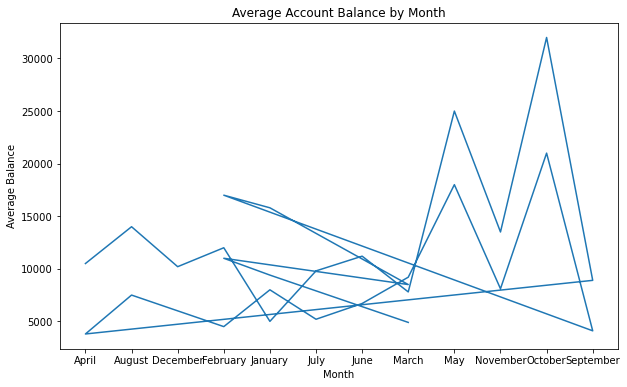

In [4]:
import pandas as pd

# Load data
data = pd.read_csv("Basic_data_formatted.csv")

# Assuming "AccOpen" can be parsed as datetime
data["AccOpenDate"] = pd.to_datetime(data["AccOpen"], format="%d-%b-%y")
data["Year"] = data["AccOpenDate"].dt.year
data["Month"] = data["AccOpenDate"].dt.month_name()

# Calculate monthly/yearly average balance or other metrics (adjust as needed)
monthly_avg_balance = data.groupby(["Year", "Month"])["Balance"].mean().reset_index()
yearly_avg_balance = data.groupby("Year")["Balance"].mean().reset_index()
num_accounts_per_month = data.groupby(["Year", "Month"])["AccID"].count().reset_index(name="NumAccounts")
num_accounts_per_year = data.groupby("Year")["AccID"].count().reset_index(name="NumAccounts")

# Visualization (using Matplotlib or other libraries)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_balance["Month"], monthly_avg_balance["Balance"])
plt.xlabel("Month")
plt.ylabel("Average Balance")
plt.title("Average Account Balance by Month")
plt.show()

# (Similar plots can be created for yearly trends and number of accounts)


## 3. Identifying Potential Inactive Accounts:

Objective: Find accounts that haven't had any recent activity (transactions, balance changes) to potentially target them for reactivation campaigns or account closure considerations. 

In [6]:
import pandas as pd

# Load data (assuming a "LastActivity" column for activity date)
data = pd.read_csv("Basic_data_formatted.csv")

# Assuming "LastActivity" can be parsed as datetime
data["LastActivityDate"] = pd.to_datetime(data["AccOpen"], format="%d-%b-%y")  # Replace format if needed

# Calculate days since last activity
data["DaysSinceLastActivity"] = (pd.Timestamp("today") - data["LastActivityDate"]).dt.days

# Define a threshold for inactivity (adjust as needed)
inactivity_threshold = 365  # Days

# Identify potentially inactive accounts
inactive_accounts = data[data["DaysSinceLastActivity"] >= inactivity_threshold]

# Analyze characteristics of inactive accounts
print(inactive_accounts.describe())  # View summary statistics
print(inactive_accounts["Gender"].value_counts())  # Analyze gender distribution

# (Consider contacting or offering incentives to these accounts)


             Age       Balance  DaysSinceLastActivity
count  30.000000     30.000000              30.000000
mean   35.233333  10953.333333            1062.766667
std    15.858607   6464.744352             319.066924
min     3.000000   3800.000000             379.000000
25%    27.250000   6900.000000             864.000000
50%    32.500000   9300.000000            1093.000000
75%    40.750000  13125.000000            1308.000000
max    99.000000  32000.000000            1536.000000
M     15
F     14
22     1
Name: Gender, dtype: int64
